In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

In [2]:
path = f'/home/msc2/DataViz/Assignment1/datasets/Assignment1/'
save_path = f'/home/msc2/DataViz/Assignment1/plots/Assignment1/'

In [3]:
df = pd.read_csv(path+'population.csv')
df_une = pd.read_csv(path+'unemployment.csv')

In [4]:
df.head()

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124


In [5]:
# Let us rename the columns for further merge

df.rename(columns = {'District.Code': 'District Code','District.Name': 'District Name','Neighborhood.Code': 'Neighborhood Code','Neighborhood.Name': 'Neighborhood Name'}, inplace = True)

In [6]:
df['Year'].value_counts()

2017    14016
2016    14016
2015    14016
2014    14016
2013    14016
Name: Year, dtype: int64

In [7]:
df.shape

(70080, 8)

In [8]:
df['Gender'].value_counts()

Male      35040
Female    35040
Name: Gender, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70080 entries, 0 to 70079
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               70080 non-null  int64 
 1   District Code      70080 non-null  int64 
 2   District Name      70080 non-null  object
 3   Neighborhood Code  70080 non-null  int64 
 4   Neighborhood Name  70080 non-null  object
 5   Gender             70080 non-null  object
 6   Age                70080 non-null  object
 7   Number             70080 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 4.3+ MB


In [10]:
df['Age'].value_counts()

0-4      3650
5-9      3650
90-94    3650
85-89    3650
80-84    3650
75-79    3650
70-74    3650
65-69    3650
60-64    3650
55-59    3650
50-54    3650
45-49    3650
40-44    3650
35-39    3650
30-34    3650
25-29    3650
20-24    3650
15-19    3650
10-14    3650
>=95      730
Name: Age, dtype: int64

In [11]:
df['District Name'].value_counts()

Nou Barris             12480
Horta-Guinardó         10560
Sant Martí              9600
Sants-Montjuïc          7680
Sant Andreu             6720
Eixample                5760
Sarrià-Sant Gervasi     5760
Gràcia                  4800
Ciutat Vella            3840
Les Corts               2880
Name: District Name, dtype: int64

<h3>District population across years</h3>

In [12]:
table = pd.pivot_table(data = df, index = 'District Name', values = 'Number',columns = 'Year', aggfunc = np.sum)
table

Year,2013,2014,2015,2016,2017
District Name,,,,,
Ciutat Vella,103339,100685,100115,100070,101387
Eixample,264780,263565,263558,264305,266416
Gràcia,120949,120273,120401,120918,121347
Horta-Guinardó,167743,166950,166559,167268,168751
Les Corts,81640,81200,81530,81642,82033
Nou Barris,165748,164516,164648,164881,166579
Sant Andreu,146846,145983,146494,146731,147594
Sant Martí,232826,232629,233659,233928,235513
Sants-Montjuïc,182685,180824,180757,180977,181910


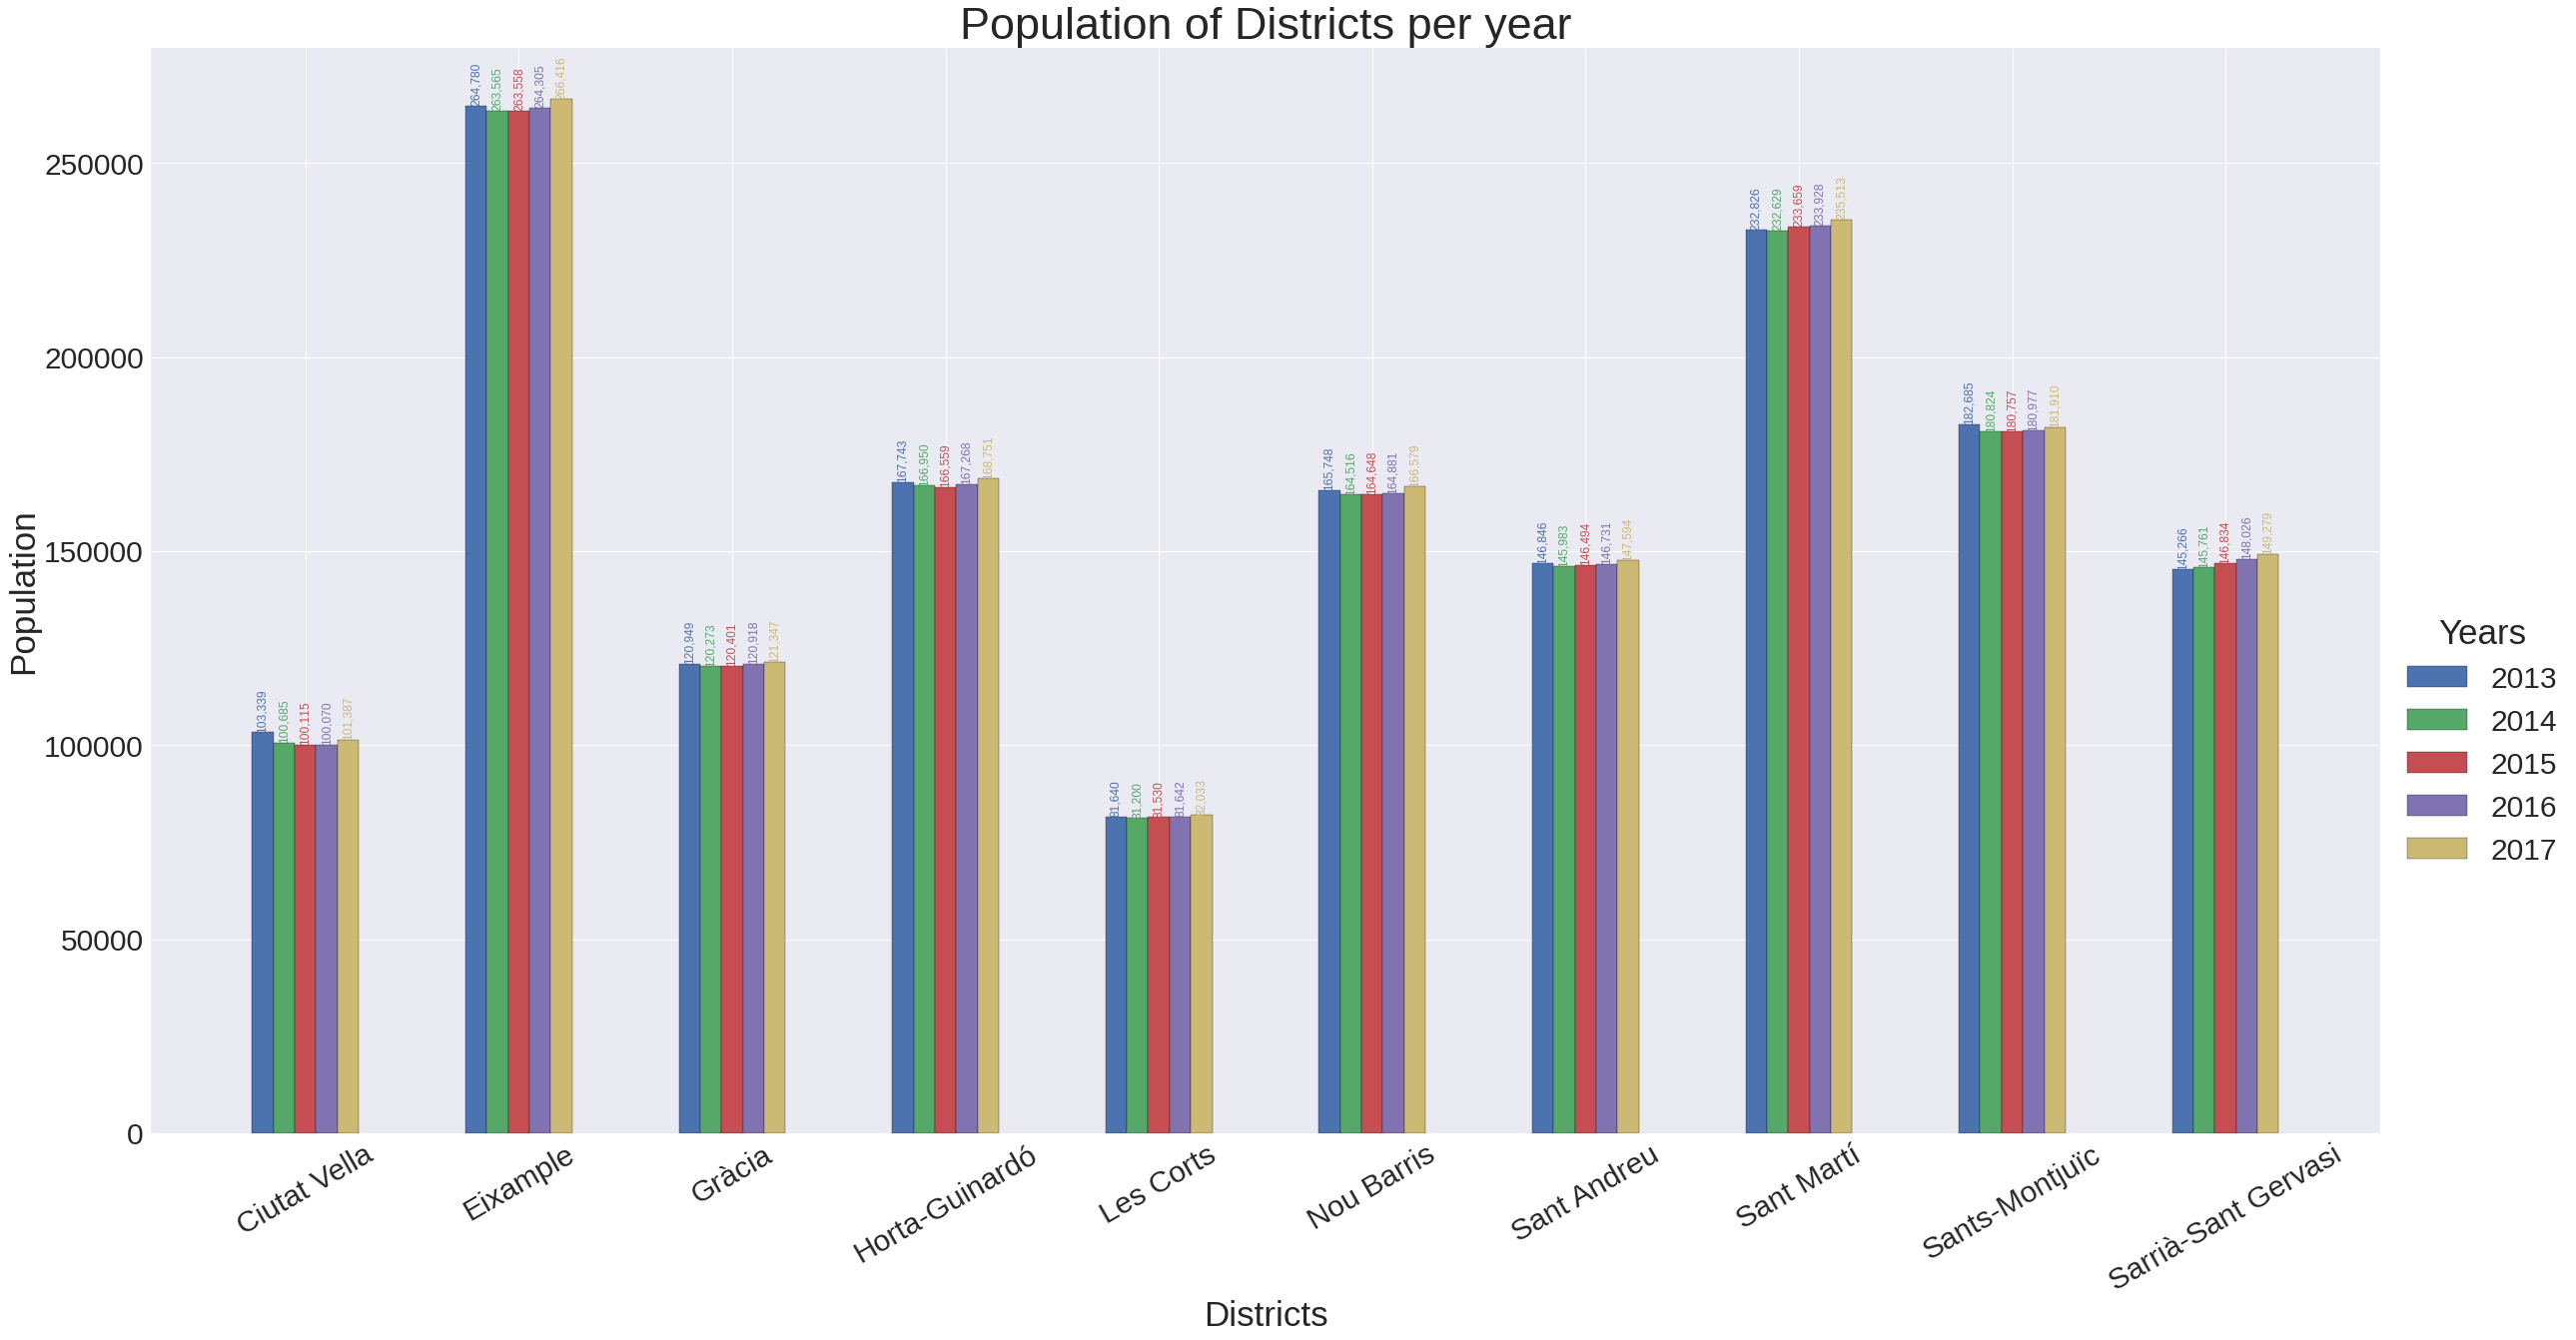

In [13]:
fig,ax = plt.subplots(1,1, figsize = (40,20))
label = list(table.index)
x = np.arange(len(label))
width = 0.1

b1 = ax.bar(x-(2*width), table[2013], width = width, label= 2013, edgecolor = 'black')
b2 = ax.bar(x-(width), table[2014], width = width, label= 2014, edgecolor = 'black')
b3 = ax.bar(x, table[2015], width = width, label= 2015, edgecolor = 'black')
b4 = ax.bar(x+(width), table[2016], width = width, label= 2016, edgecolor = 'black')
b5 = ax.bar(x+(2*width), table[2017], width = width, label= 2017, edgecolor = 'black')

ax.set_xlabel('Districts', fontsize = 35)
ax.set_ylabel('Population',fontsize = 35)
ax.set_title('Population of Districts per year', fontsize = 45)

ax.set_xticks(x)
ax.set_xticklabels(label)

ax.legend(title = 'Years', fontsize = 30, title_fontsize = 35, bbox_to_anchor = (1,0.5))

ax.tick_params(axis = "x",
              which = "both",
              labelrotation = 30,
              labelsize = 30)
ax.tick_params(axis = "y",
              which = "both",
              labelsize = 30)

for bar in ax.patches:
    bar_value = bar.get_height()
    text = f'{bar_value:,}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12, rotation = 'vertical')

plt.savefig(save_path+'population_per_year.jpg', dpi = 300)

<h2>Inference from the above plot</h2><h3>We can see that for almost all the districts the population is not changing much across the years. Also based on other features such as Age and Gender etc. We can see that it is almost equally divided. Hence, this data might be balanced for classification.</h3>

<h3>Now let us see the unemployment data stats</h3>

In [14]:
df_une.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14208 entries, 0 to 14207
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               14208 non-null  int64 
 1   Month              14208 non-null  object
 2   District Code      14208 non-null  int64 
 3   District Name      14208 non-null  object
 4   Neighborhood Code  14208 non-null  int64 
 5   Neighborhood Name  14208 non-null  object
 6   Gender             14208 non-null  object
 7   Demand_occupation  14208 non-null  object
 8   Number             14208 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 999.1+ KB


In [15]:
df_une.head()

,Year,Month,District Code,District Name,Neighborhood Code,Neighborhood Name,Gender,Demand_occupation,Number
0,2017,January,1,Ciutat Vella,1,el Raval,Male,Registered unemployed,2107
1,2017,January,1,Ciutat Vella,2,el Barri Gòtic,Male,Registered unemployed,538
2,2017,January,1,Ciutat Vella,3,la Barceloneta,Male,Registered unemployed,537
3,2017,January,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,Registered unemployed,741
4,2017,January,2,Eixample,5,el Fort Pienc,Male,Registered unemployed,630


<h2>Unemployment numbers across years and the demand</h2>

In [16]:
table = pd.pivot_table(data = df_une, index = 'District Name', values = 'Number',columns  = ['Demand_occupation','Year'], aggfunc = 'sum')
table

Demand_occupation   Registered unemployed                                  \
Year                                 2013    2014    2015    2016    2017   
District Name                                                               
Ciutat Vella                       111245  103594   96052   86529   80119   
Eixample                           185128  169837  151174  132428  120935   
Gràcia                              89141   81295   73074   63764   58127   
Horta-Guinardó                     145411  135543  121662  107433   97353   
Les Corts                           52504   49570   44695   38844   34529   
No consta                              54      62      36     123      88   
Nou Barris                         177627  167536  153966  136069  122721   
Sant Andreu                        134783  126632  114850  100846   89952   
Sant Martí                         211972  197409  178209  157624  143987   
Sants-Montjuïc                     158068  150748  137126  120568  107560   
Sarrià-Sant Gervasi                 65280   59365   53737   46948   42525   

Demand_occupation   Unemployment demand                
Year                               2015   2016   2017  
District Name                                          
Ciutat Vella                      23079  21785  20981  
Eixample                          39298  37126  35372  
Gràcia                            18502  17760  16636  
Horta-Guinardó                    28482  26673  25262  
Les Corts                         12225  11565  10738  
No consta                            95     54    157  
Nou Barris                        31473  29293  28837  
Sant Andreu                       28904  25615  24010  
Sant Martí                        42247  38979  37544  
Sants-Montjuïc                    32849  30169  29491  
Sarrià-Sant Gervasi               12003  11889  11185

In [17]:
table = pd.pivot_table(data = df_une, index = 'Year', columns = 'Demand_occupation',values = 'Number', aggfunc = 'sum')

In [18]:
table1 = pd.pivot_table(data = df, index = 'Year' ,values = 'Number', aggfunc = 'sum')

In [19]:
table1

,Number
Year,
2013,1611822
2014,1602386
2015,1604555
2016,1608746
2017,1620809


In [20]:
table

Demand_occupation,Registered unemployed,Unemployment demand
Year,,
2013,1331213.0,NaN
2014,1241591.0,NaN
2015,1124581.0,269157.0
2016,991176.0,250908.0
2017,897896.0,240213.0


<h3> 'table1' gives us the population per year and 'table' gives us the unemployment rate of that year</h3> 

In [21]:
years = list(table.index)
unemp = list(table['Registered unemployed'])
total = list(table1.Number)

In [22]:
div = lambda x,y: x/y
rates = list(map(div, unemp,total))

In [23]:
rates

[0.8259057141545406,
 0.7748388964956009,
 0.7008678418626971,
 0.6161171496308304,
 0.5539801420154997]

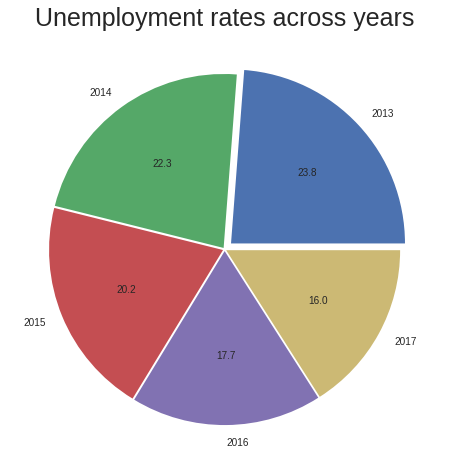

In [24]:
plt.figure(figsize = (8,8))
plt.pie(x = rates, labels = years, explode = [0.05,0.01,0.01,0.01, 0.01], autopct = '%0.1f', radius = 1)
plt.title('Unemployment rates across years', fontsize = 25)
plt.savefig(save_path+'unemployment_rates.jpg', dpi = 400)
plt.show()

<h2>Inference: </h2><h3>From here we can see that the unemployment rates have decreased across the years and a huge difference can be seen in the rates in 5 years</h3>

In [25]:
df.head()

,Year,District Code,District Name,Neighborhood Code,Neighborhood Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124


In [26]:
df_une.head()

,Year,Month,District Code,District Name,Neighborhood Code,Neighborhood Name,Gender,Demand_occupation,Number
0,2017,January,1,Ciutat Vella,1,el Raval,Male,Registered unemployed,2107
1,2017,January,1,Ciutat Vella,2,el Barri Gòtic,Male,Registered unemployed,538
2,2017,January,1,Ciutat Vella,3,la Barceloneta,Male,Registered unemployed,537
3,2017,January,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,Registered unemployed,741
4,2017,January,2,Eixample,5,el Fort Pienc,Male,Registered unemployed,630


<h2>The age distribution of residents of Barcelona across the years</h2> 

In [27]:
table = pd.pivot_table(data = df, index = 'Age', values = 'Number',columns = 'Year', aggfunc = 'sum')
table

Year,2013,2014,2015,2016,2017
Age,,,,,
0-4,69267,68901,68661,68286,68402
10-14,62566,63599,64632,65584,67575
15-19,63540,62792,63436,64613,65953
20-24,78485,76521,76575,77442,79062
25-29,110563,105152,103101,103320,106489
30-34,138330,131846,127772,123597,122353
35-39,142658,141526,140013,136955,134575
40-44,125335,126704,129401,131877,133557
45-49,117489,117472,116976,117519,118332


In [28]:
table.insert(0, 'merged_Age',['0-19','0-19','0-19','20-39','20-39','20-39','20-39','40-59','40-59','0-19','40-59','40-59','60-79','60-79','60-79','60-79','80-94','80-94','80-94','>=95'])

In [29]:
table

Year,merged_Age,2013,2014,2015,2016,2017
Age,,,,,,
0-4,0-19,69267,68901,68661,68286,68402
10-14,0-19,62566,63599,64632,65584,67575
15-19,0-19,63540,62792,63436,64613,65953
20-24,20-39,78485,76521,76575,77442,79062
25-29,20-39,110563,105152,103101,103320,106489
30-34,20-39,138330,131846,127772,123597,122353
35-39,20-39,142658,141526,140013,136955,134575
40-44,40-59,125335,126704,129401,131877,133557
45-49,40-59,117489,117472,116976,117519,118332


In [30]:
table.columns

Index(['merged_Age', 2013, 2014, 2015, 2016, 2017], dtype='object', name='Year')

In [31]:
table['merged_Age'].value_counts()

0-19     4
20-39    4
40-59    4
60-79    4
80-94    3
>=95     1
Name: merged_Age, dtype: int64

In [32]:
ntable = pd.pivot_table(data = table, index = 'merged_Age', values = [2013, 2014, 2015, 2016, 2017], aggfunc = 'sum')

In [33]:
ntable

Year,2013,2014,2015,2016,2017
merged_Age,,,,,
0-19,262818,263755,265332,267324,271239
20-39,470036,455045,447461,441314,442479
40-59,446789,449946,456377,462839,467879
60-79,314580,313488,313038,313661,314192
80-94,113348,115664,117596,118568,119605
>=95,4251,4488,4751,5040,5415


<h3>The idea behind this table was to plot a stacked bar chart where the x_values will be the 'merged_Age' column and the height will be the rows respective to each age range across the years</h3>

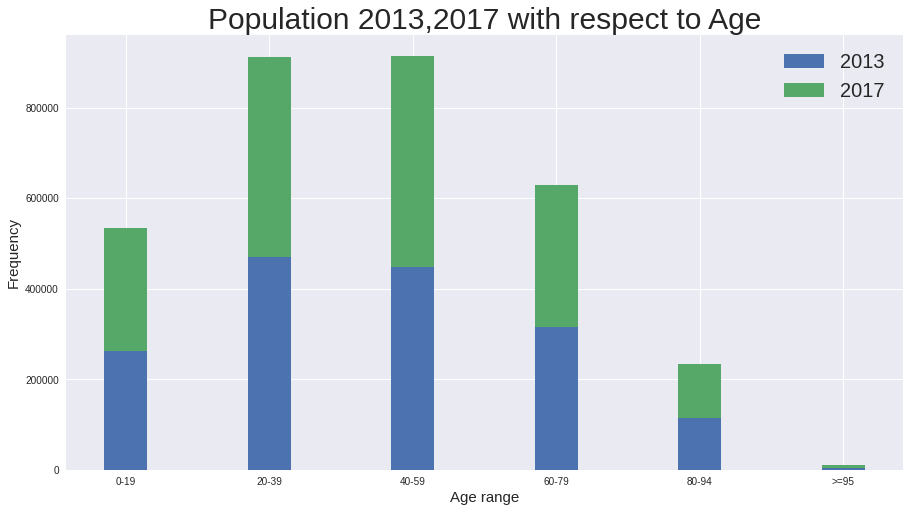

In [34]:
labels = ['0-19','20-39','40-59','60-79','80-94','>=95']
w = 0.3
x1 = list(ntable[2013])
x5 = list(ntable[2017])
fig,ax = plt.subplots(1,1, figsize = (15,8))
ax.bar(labels, height = x1, label = '2013', width =w)
ax.bar(labels, height = x5, label = '2017',bottom = x1,width=w)
ax.set_xlabel('Age range', fontsize = 15)
ax.set_ylabel('Frequency', fontsize = 15)
ax.set_title('Population 2013,2017 with respect to Age', fontsize = 30)
ax.legend(['2013', '2017'], fontsize = 20)
plt.savefig(save_path+'population_across_years.jpg',dpi = 200)
plt.show()

<h2>Inference</h2><h3>From this we can see that the population has not changed much across the age ranges in 5 years</h3>

In [35]:
df.head()

,Year,District Code,District Name,Neighborhood Code,Neighborhood Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124


In [36]:
df_une.head()

,Year,Month,District Code,District Name,Neighborhood Code,Neighborhood Name,Gender,Demand_occupation,Number
0,2017,January,1,Ciutat Vella,1,el Raval,Male,Registered unemployed,2107
1,2017,January,1,Ciutat Vella,2,el Barri Gòtic,Male,Registered unemployed,538
2,2017,January,1,Ciutat Vella,3,la Barceloneta,Male,Registered unemployed,537
3,2017,January,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,Registered unemployed,741
4,2017,January,2,Eixample,5,el Fort Pienc,Male,Registered unemployed,630


<h2>Pie chart of district-wise population</h2>

In [37]:
table = pd.pivot_table(data = df, index = 'District Name', values = 'Number', aggfunc = 'sum')
table

,Number
District Name,
Ciutat Vella,505596
Eixample,1322624
Gràcia,603888
Horta-Guinardó,837271
Les Corts,408045
Nou Barris,826372
Sant Andreu,733648
Sant Martí,1168555
Sants-Montjuïc,907153


In [38]:
total = sum(table['Number'])

In [39]:
table['Number']/total

District Name
Ciutat Vella           0.062820
Eixample               0.164335
Gràcia                 0.075033
Horta-Guinardó         0.104031
Les Corts              0.050699
Nou Barris             0.102676
Sant Andreu            0.091155
Sant Martí             0.145192
Sants-Montjuïc         0.112713
Sarrià-Sant Gervasi    0.091344
Name: Number, dtype: float64

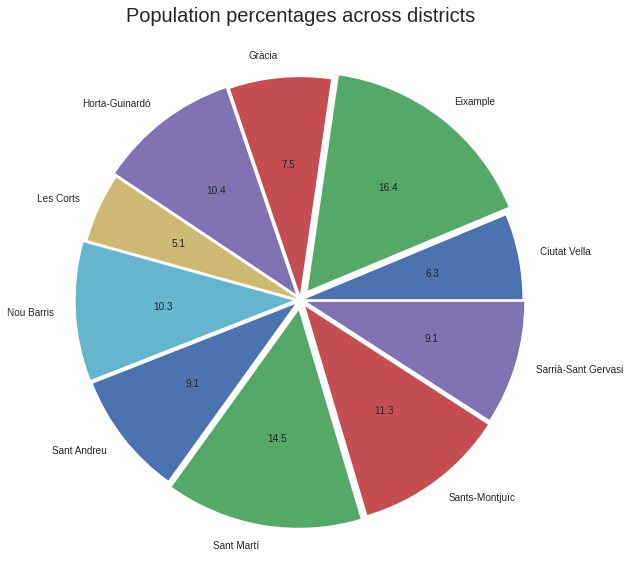

In [40]:
plt.figure(figsize = (10,10))
percentages = table['Number']/total
plt.pie(x = list(percentages), labels = table.index, explode = list(percentages/3), autopct = '%0.1f', radius = 1)
plt.rc('axes', labelsize = 15)
plt.title('Population percentages across districts', fontsize = 20)
plt.savefig(save_path+'population_rates_district_wise.jpg', dpi = 300)
plt.show()

<h2>Inference</h2><h3>Here we can see that Eixample district is the most populated with almost 16.5% of the total population concentrated there followed by Sant Marti with 14.5% of the total population concentrated there</h3>

<h3>Further analysis is to be performed on these two districts</h3>

In [41]:
de = pd.read_csv(path+'deaths.csv')
da = pd.read_csv(path+'accidents_2017.csv')

In [42]:
de.rename(columns = {'District.Code': 'District Code','District.Name': 'District Name','Neighborhood.Code': 'Neighborhood Code','Neighborhood.Name': 'Neighborhood Name'}, inplace = True)

In [43]:
de.head()

,Year,District Code,District Name,Neighborhood Code,Neighborhood Name,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,0-4,1
1,2017,1,Ciutat Vella,2,el Barri Gòtic,0-4,1
2,2017,1,Ciutat Vella,3,la Barceloneta,0-4,0
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",0-4,0
4,2017,2,Eixample,5,el Fort Pienc,0-4,0


In [44]:
da.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360886
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


In [45]:
de['Year'].value_counts()

2017    1533
2016    1533
2015    1533
Name: Year, dtype: int64

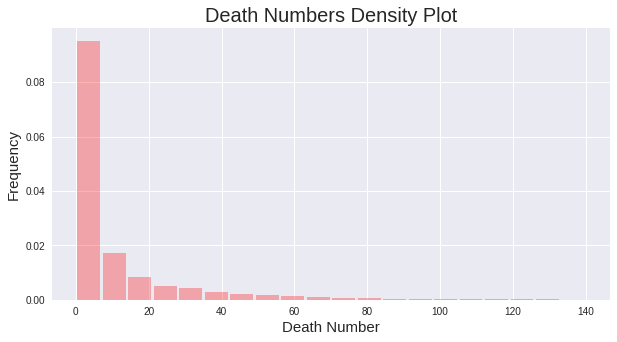

In [46]:
base_p = de['Number']
plt.figure(figsize = (10,5))
plt.hist(base_p, density=True, facecolor='red', alpha=0.3, rwidth = 0.9, bins = 20, range = (min(base_p), 140))
plt.title('Death Numbers Density Plot', fontsize = 20)
plt.xlabel('Death Number')
plt.ylabel('Frequency')
plt.savefig(save_path+'death_number_hist.jpg',dpi = 200)
plt.show()

<h2>Histogram</h2>

In [47]:
table = pd.pivot_table(data = de, index = 'District Name', values = 'Number', columns= 'Year',aggfunc = 'sum')

In [48]:
table1 = pd.pivot_table(data = da, index = 'District Name', values = 'Victims',columns = 'Weekday', aggfunc = 'sum')

In [49]:
hrv = da.loc[:, ['Hour','Victims']]
hrv.head()

,Hour,Victims
0,8,2
1,13,2
2,21,5
3,2,1
4,14,1


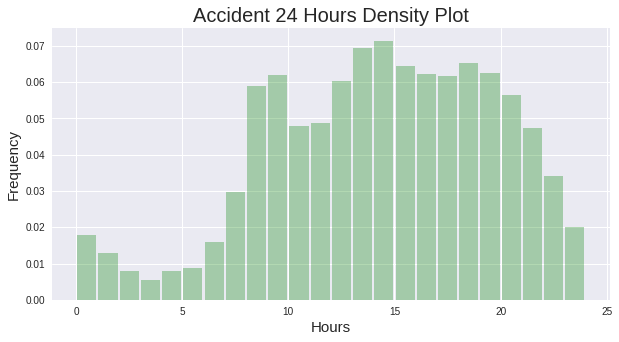

In [50]:
base_p = hrv['Hour']
plt.figure(figsize = (10,5))
plt.hist(base_p, density=True, facecolor='green', alpha=0.3, rwidth = 0.9, bins = 24, range = (min(base_p), 24))
plt.title('Accident 24 Hours Density Plot', fontsize = 20)
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.savefig(save_path+'accident_hour_hist.jpg',dpi = 200)
plt.show()

<h3>From here, we can see that the most number of accidents happened in the 14th hour of the day, i.e., afternoon 2pm.<br> - Also that there is lesser accidents in the night to early morning hours of the day due to lesser traffic maybe.<br> - We can also see that the accidents frequency is more in the morning and afternoon hours. </h3>

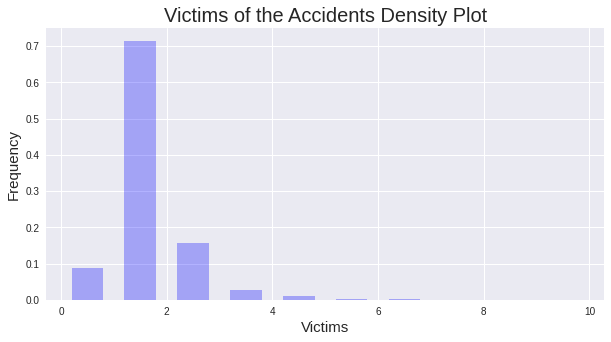

In [51]:
base_p = hrv['Victims']
plt.figure(figsize = (10,5))
plt.hist(base_p, density=True, facecolor='blue', alpha=0.3, rwidth = 0.6, bins = 10, range = (min(base_p), max(base_p)))
plt.title('Victims of the Accidents Density Plot', fontsize = 20)
plt.xlabel('Victims')
plt.ylabel('Frequency')
plt.savefig(save_path+'no_of_victims_hist.jpg',dpi = 200)
plt.show()

<h3> We can see that in 70% of the accidents that happened only 1 victim or 1 person is injured.</h3>

<h1>Barplot</h1>

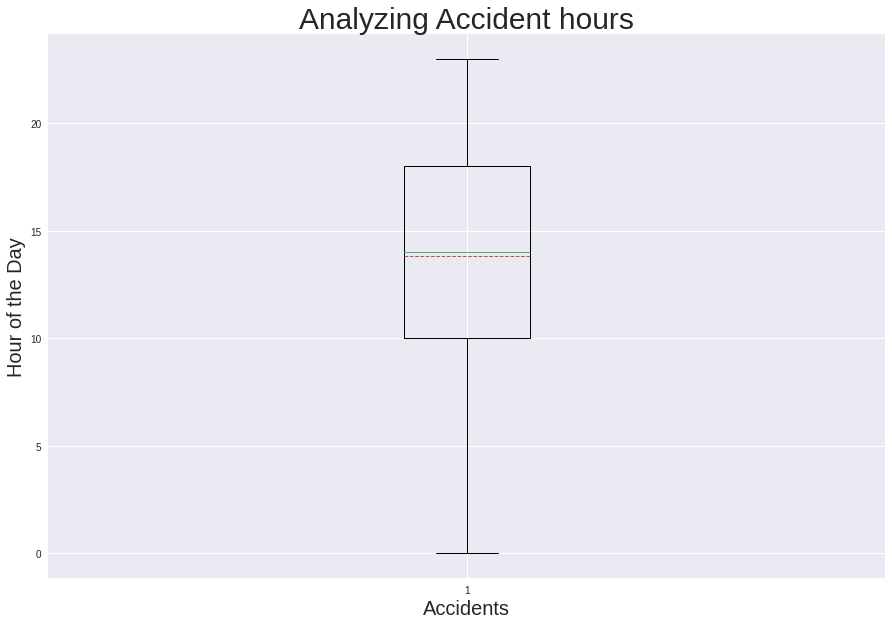

In [52]:
plt.figure(figsize = (15,10))
plt.boxplot(x= hrv['Hour'], showmeans = True, meanline = True, manage_ticks = True)
plt.title('Analyzing Accident hours', fontsize = 30)
plt.xlabel('Accidents', fontsize = 20)
plt.ylabel('Hour of the Day', fontsize = 20)
plt.savefig(save_path+'accident_hours_boxplot.jpg', dpi = 300)
plt.show()

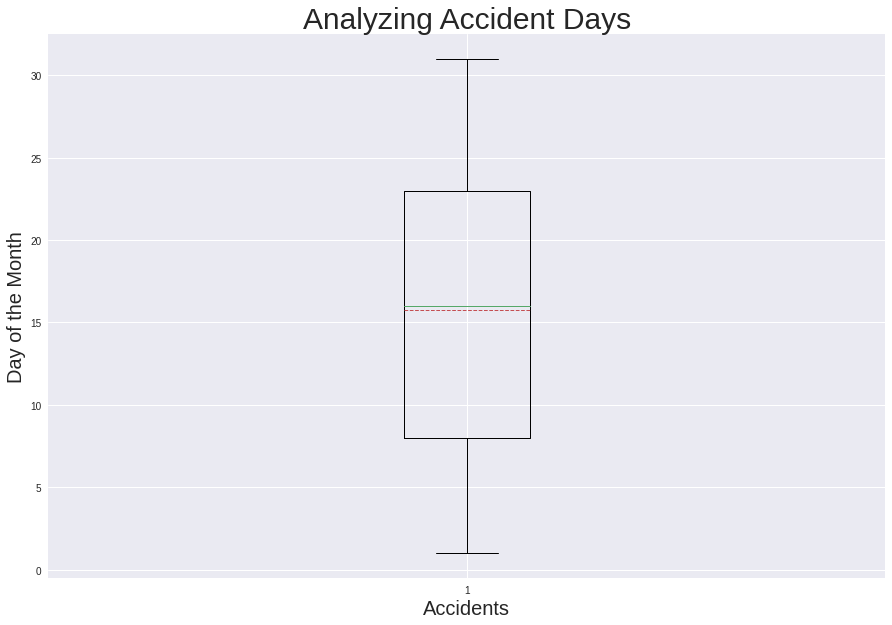

In [53]:
plt.figure(figsize = (15,10))
plt.boxplot(x= da['Day'], showmeans = True, meanline = True, manage_ticks = True)
plt.title('Analyzing Accident Days', fontsize = 30)
plt.xlabel('Accidents', fontsize = 20)
plt.ylabel('Day of the Month', fontsize = 20)
plt.savefig(save_path+'accident_days_boxplot.jpg', dpi = 300)
plt.show()